
    1.Название работы: Частотная и фазовая модуляция

    2.Цель: изучение частотной и фазовой модуляции/демодуляции сигнала.

    3.Постановка задачи:
        1. Сгенерировать однотональный сигнал низкой частоты.

        2. Выполнить фазовую модуляцию/демодуляцию сигнала по закону
    u(t) = (U m cos(Ωt + ks(t)), используя встроенную функцию
    MatLab pmmod, pmdemod

        3. Получить спектр модулированного сигнала.

        4. Выполнить частотную модуляцию/демодуляцию по закону
    u(t) = Um * cos(ω0*t + k * integrate(0,t,s(t) * dt + φ0)
    используя встроенные функции MatLab fmmod, fmdemod

    4.Теоритический раздел
        Частотная модуляция — вид аналоговой модуляции, при котором информационный
        сигнал управляет частотой несущего колебания. По сравнению с
        амплитудной модуляцией здесь амплитуда остаётся постоянной.
        ЧМ применяется для высококачественной передачи звукового (низкочастотного)
        сигнала в радиовещании (в диапазоне УКВ), для звукового

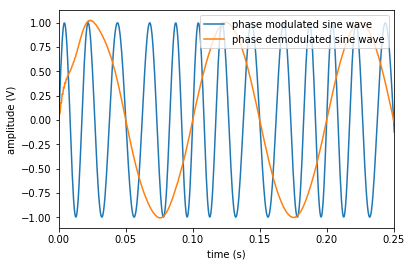

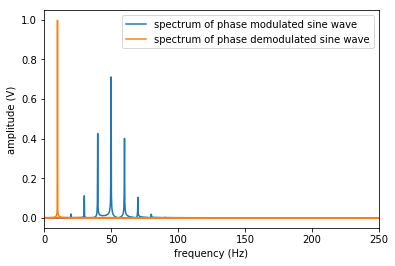

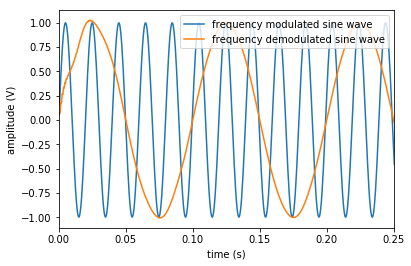

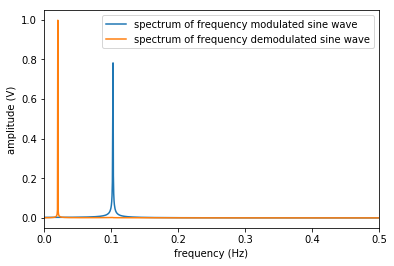


    6.Выводы:
        В ходе выполнения работы мы ознакомились с угловой модуляцией и демодуляцией,
        их разновидностями.
        Для фазовой и частотной модуляции были продемонстрированы частотные и
        временные характеристики закодированных и декодированных сигналов.


    


In [3]:
import sys
sys.path.append("../..") 

import numpy as np
from scipy.signal import hilbert
import scipy.integrate as integrate

from Telecom.my_telecom import *


print(lab5_theory.__doc__)


pic = 0
sig_freq = 10  # frequency of original signal
T = 1.0 / sig_freq
sig_ampl = 1  # amplitude of original signal
fs = 2000  # sampling rate
ts = 1.0 / fs  # sampling interval
n = 1 << 13  # number of fft points, pick power of 2

t = np.arange(0, n * ts, step=ts)  # time vector
sig = sig_ampl * np.sin(2 * np.pi * sig_freq * t)

# ----------------------------- Parameters of modulation signal ------------------------------
carrier_freq = 50
carrier_amplitude = sig_ampl
# ----------------------------- Parameters of plotting ------------------------------
sig_xlim = (0, 0.25)

# ----------------------------- main part ------------------------------------------
phase_modulated = carrier_amplitude * np.sin(2 * np.pi * carrier_freq * t + sig)

sig_integrated = np.zeros_like(sig)
for i, dt in enumerate(t):
    sig_integrated[i] = integrate.simps(sig, dx=t[i])

freq_modulated = carrier_amplitude * np.sin(2 * np.pi * carrier_freq * t + sig_ampl * sig_integrated)

analytic_signal = hilbert(phase_modulated)
phase_function = np.unwrap(np.angle(analytic_signal) + np.pi / 2)

phase_demodulated = phase_function - 2 * np.pi * carrier_freq * t
freq_demodulated = phase_function - 2 * np.pi * carrier_freq * t

fft_freq = np.fft.fftfreq(n, ts)  # python function to get Hz frequency axis

# discrete Fourier Transform ( / n * 2 - normalization)
phase_modulated_fft = abs(np.fft.fft(phase_modulated)) / n * 2
phase_demodulated_fft = abs(np.fft.fft(phase_demodulated)) / n * 2

# discrete Fourier Transform ( / n * 2 - normalization)
freq_modulated_fft = abs(np.fft.fft(freq_modulated)) / n * 2
freq_demodulated_fft = abs(np.fft.fft(freq_demodulated)) / n * 2

# ---------------------------- PLOTS -------------------------------------
# ------------------------------------------------------------------------
plot_graphic(t, phase_modulated,
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plot_graphic(t, phase_demodulated,
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plt.legend(('phase modulated sine wave', 'phase demodulated sine wave'), loc='upper right')
plt.show()

# ------------------------------------------------------------------------
plot_graphic(fft_freq, phase_modulated_fft,
             xlim=(0, 250),
             x_label='frequency (Hz)', y_label='amplitude (V)', show=False)

plot_graphic(fft_freq, phase_demodulated_fft,
             xlim=(0, 250),
             x_label='frequency (Hz)', y_label='amplitude (V)', show=False)

plt.legend(('spectrum of phase modulated sine wave', 'spectrum of phase demodulated sine wave'),
           loc='upper right')
plt.show()

# ------------------------------------------------------------------------
plot_graphic(t[1:], freq_modulated[1:],
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plot_graphic(t[1:], freq_demodulated[1:],
             xlim=sig_xlim,
             x_label='time (s)', y_label='amplitude (V)', show=False)

plt.legend(('frequency modulated sine wave', 'frequency demodulated sine wave'),
           loc='upper right') 
plt.show()

# ------------------------------------------------------------------------
plot_graphic(t[1:], freq_modulated_fft[1:],
             xlim=(0, 0.5),
             x_label='frequency (Hz)', y_label='amplitude (V)', show=False)

plot_graphic(t[1:], freq_demodulated_fft[1:],
             xlim=(0, 0.5),
             x_label='frequency (Hz)', y_label='amplitude (V)', show=False)

plt.legend(('spectrum of frequency modulated sine wave', 'spectrum of frequency demodulated sine wave'),
           loc='upper right') 
plt.show()


print(lab5_conclusion.__doc__)